In [455]:
import pandas as pd;
import numpy as np;

### Series de pandas

In [456]:
numeros = [3, 4, 5, 6, 7]
serie = pd.Series(numeros)
serie, type(serie)

(0    3
 1    4
 2    5
 3    6
 4    7
 dtype: int64,
 pandas.core.series.Series)

### Crear dataframe

In [457]:
data = {
    "Nombre": ["Daniel", "Raul", "Valentina", "Valeria"],
    "Edad": [30, 24, 21, 22],
    "Ciudad": ["Buenos Aíres", "Londres", "Punta Arenas", "Barcelona"]
}

data, type(data)

({'Nombre': ['Daniel', 'Raul', 'Valentina', 'Valeria'],
  'Edad': [30, 24, 21, 22],
  'Ciudad': ['Buenos Aíres', 'Londres', 'Punta Arenas', 'Barcelona']},
 dict)

### Generar un dataframe

In [458]:
df = pd.DataFrame(data = data) # esta es otra forma de hacerlo, tambien se puede hacer con pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Daniel,30,Buenos Aíres
1,Raul,24,Londres
2,Valentina,21,Punta Arenas
3,Valeria,22,Barcelona


### Exportar un dataframe

In [459]:
# df.to_csv("../dataSets/data.csv");

### Importar dataframe

In [460]:
import_df = pd.read_csv("../dataSets/data.csv", index_col=0)
import_df

,Nombre,Edad,Ciudad
0,Daniel,30,Buenos Aíres
1,Raul,24,Londres
2,Valentina,21,Punta Arenas
3,Valeria,22,Barcelona


### Lista (numpy) 

In [461]:
usuarios = data = {
    "Nombre": ["Daniel", "Raul", "Valentina", "Valeria"],
    "Edad": [30, np.nan, 21, 22],
    "Ciudad": ["Buenos Aíres", "Londres", None, "Barcelona"]
}
df = pd.DataFrame(usuarios) # así lo hiso el profe
df

,Nombre,Edad,Ciudad
0,Daniel,30.0,Buenos Aíres
1,Raul,NaN,Londres
2,Valentina,21.0,None
3,Valeria,22.0,Barcelona


### Rellenar valores faltantes

In [462]:
df_fill = df.fillna({
    "Edad": df["Edad"].mean(),
    "Ciudad": "Desconocido"
})
df_fill

,Nombre,Edad,Ciudad
0,Daniel,30.000000,Buenos Aíres
1,Raul,24.333333,Londres
2,Valentina,21.000000,Desconocido
3,Valeria,22.000000,Barcelona


### Eliminar filas faltantes

In [463]:
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Daniel,30.0,Buenos Aíres
3,Valeria,22.0,Barcelona


### Reemplazar valores de una columna

In [464]:
df_reem = df.replace({
    "Ciudad": {
        None: "Puerto Natales"
    }
})
df_reem

,Nombre,Edad,Ciudad
0,Daniel,30.0,Buenos Aíres
1,Raul,NaN,Londres
2,Valentina,21.0,Puerto Natales
3,Valeria,22.0,Barcelona


### Interpolar valores


In [465]:
df_interpolado = df.copy()
df_interpolado["Edad"] = df["Edad"].interpolate()
df_interpolado

,Nombre,Edad,Ciudad
0,Daniel,30.0,Buenos Aíres
1,Raul,25.5,Londres
2,Valentina,21.0,None
3,Valeria,22.0,Barcelona


In [466]:
data = {
    "Nombre": ["Daniel", "Raul", "Valentina", "Valeria", "Fernanda"],
    "Edad": [30, 24, 21, 22, 22],
    "Ciudad": ["Buenos Aíres", "Londres", "Punta Arenas", "Barcelona","Tokio"],
    "Puntación": [80, 90, 85, 91, 86]
}

df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad,Puntación
0,Daniel,30,Buenos Aíres,80
1,Raul,24,Londres,90
2,Valentina,21,Punta Arenas,85
3,Valeria,22,Barcelona,91
4,Fernanda,22,Tokio,86


### Agrupar datos por ciudad

In [467]:
grouped = df.groupby("Ciudad")
print(f"Datos agrupados {grouped.groups}")

Datos agrupados {'Barcelona': [3], 'Buenos Aíres': [0], 'Londres': [1], 'Punta Arenas': [2], 'Tokio': [4]}


### Agregar datos

In [468]:
data["Categoria"] = ["A", "B", "A", "B", "C"]
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad,Puntación,Categoria
0,Daniel,30,Buenos Aíres,80,A
1,Raul,24,Londres,90,B
2,Valentina,21,Punta Arenas,85,A
3,Valeria,22,Barcelona,91,B
4,Fernanda,22,Tokio,86,C


### Agrupamos datos por ciudad y categoria


In [469]:
grouped_multi = df.groupby(["Ciudad", "Categoria"])
print(f"Datos clasificados {grouped_multi.groups}");

Datos clasificados {('Barcelona', 'B'): [3], ('Buenos Aíres', 'A'): [0], ('Londres', 'B'): [1], ('Punta Arenas', 'A'): [2], ('Tokio', 'C'): [4]}


### Agregar suma de edades y puntacion por ciudad y categoria

In [470]:
aggregated_data_multi = grouped_multi.agg({
    "Edad" : "sum",
    "Puntación": "mean"
})
aggregated_data_multi

,,Edad,Puntación
Ciudad,Categoria,,
Barcelona,B,22,91.0
Buenos Aíres,A,30,80.0
Londres,B,24,90.0
Punta Arenas,A,21,85.0
Tokio,C,22,86.0


### Importar librerías + numpy (ya importada)

In [471]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

cali = datasets.fetch_california_housing()
print(cali)
print()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

### Verificar la información obtenida de DataSet

In [472]:
print('Información del dataset: ')
print(cali.keys()) # obtener datos principales del dataset

Información del dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


### Verificar las caracteristicas del dataset

In [473]:
print('Características del dataset: ');
print(cali.DESCR) # descripción del dataset

Características del dataset: 
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S

### Verificar las cantidad de datos

In [474]:
print(f'La cantidad de datos: {cali.data.shape}');

La cantidad de datos: (20640, 8)


### Verificar nombre de columnas

In [475]:
print('Nombre de columnas');
print(cali.feature_names)

Nombre de columnas
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Columna definir

In [476]:
X = cali.data[:, np.newaxis, 5]
Y = cali.target

### Verificamos datos anteriores (Columnas a definir)

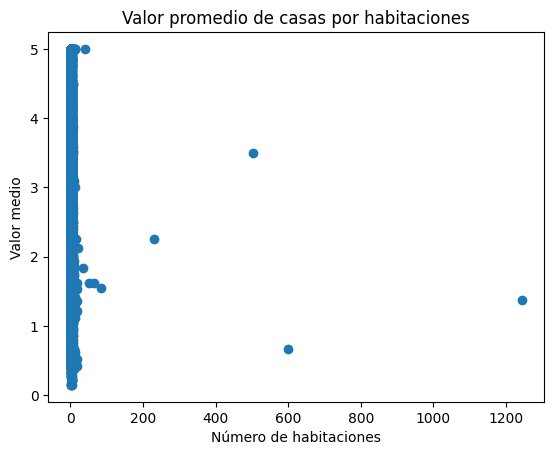

In [477]:
plt.scatter(X, Y)
plt.title('Valor promedio de casas por habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

### Implementación registro lineal

In [478]:
from sklearn.model_selection import train_test_split # !IMPORTANTE, generamos un modelo predictivo (Machine Learning)

### Separamos los datos de "train" para probar el algorimo

In [479]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Definir algoritmo a utilizar

In [480]:
lm = linear_model.LinearRegression()

### Entrenamos el modelo

In [481]:
lm.fit(X_train, Y_train)

LinearRegression()

### Realizamos la predicción

In [482]:
Y_pred = lm.predict(X_test)

### Graficamos los datos

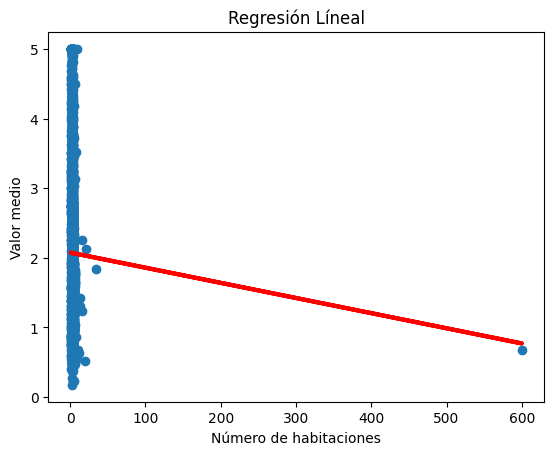

In [483]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Líneal')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

### Entendiendo le grafico

In [484]:
print()
print('Dato del modelo de regresion lineal')
print('Valor de la pendiente (o coeficiente "a")')
print(lm.coef_)
print('Valor de la interseccion (o coeficiente "b")')
print(lm.intercept_)


Dato del modelo de regresion lineal
Valor de la pendiente (o coeficiente "a")
[-0.0021747]
Valor de la interseccion (o coeficiente "b")
2.0757091763481115


### Generacion ecuacion

In [485]:
print('la ecuacion del modelo es: ')
print(f'Y = {lm.coef_}, X = {lm.intercept_}')

la ecuacion del modelo es: 
Y = [-0.0021747], X = 2.0757091763481115


### Ver precision del modelo

In [486]:
print()
print('La presicion del modelo es: ')
print(lm.score(X_train, Y_train))


La presicion del modelo es: 
0.0003988972524908707


### Definir parametros

> Recordar importar las librerias numpy y matplotlib.pyplot si es necesario

In [487]:
# NOTA LOS ARRAY x e y DEBEN TENER LA MISMA CANTIDAD DE ELEMENTOS, SINO DA ERROR
x = np.array([1920,1930,1940,1950,1960,1970,1980,1990])
# y = np.array([106,46,123,8,132,12,152,27,180,67,205,5,227,23,240,461])
y = np.array([106,46,123,8,132,12,152,27])

### Definir funcion

In [488]:
def fx(c1, coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx += p * (c1 ** n)
        n -= 1

    return fx

### ...

para grado 0 la prediccion es 75.7%


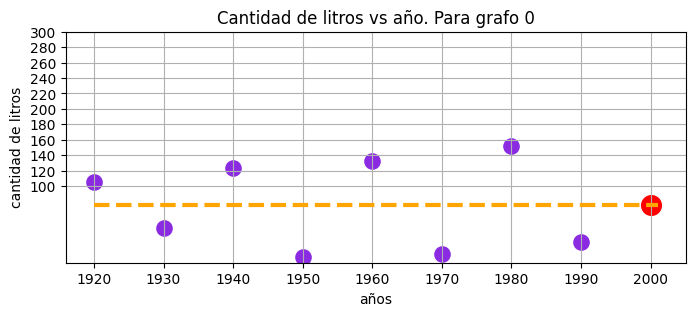

para grado 1 la prediccion es 63.3%


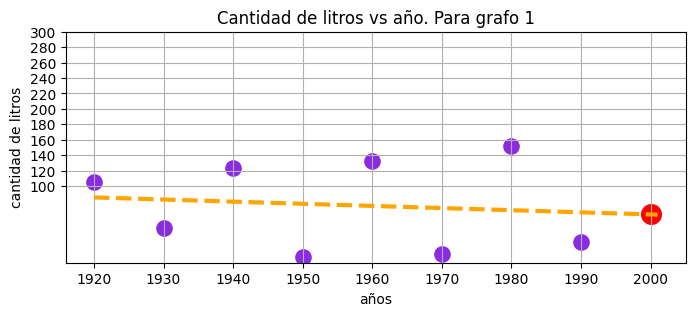

para grado 2 la prediccion es 65.5%


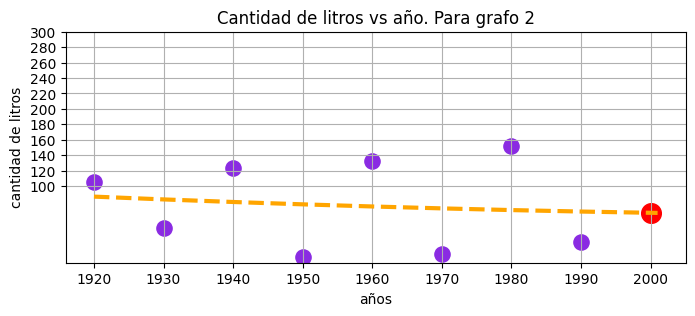

para grado 3 la prediccion es -19.3%


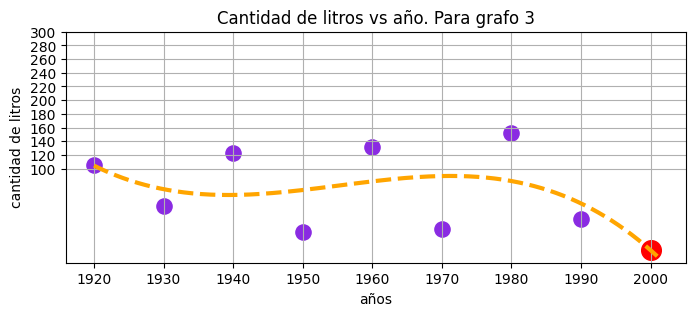

para grado 4 la prediccion es -145.9%


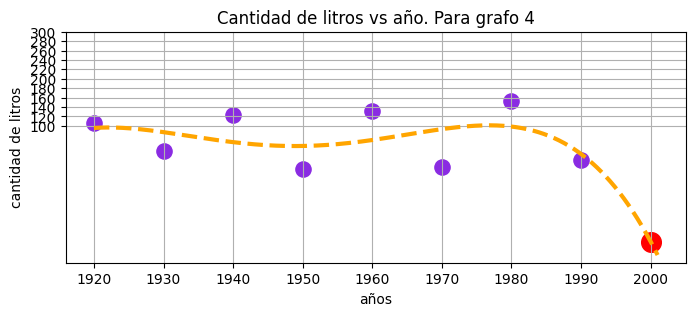

para grado 5 la prediccion es -738.7%


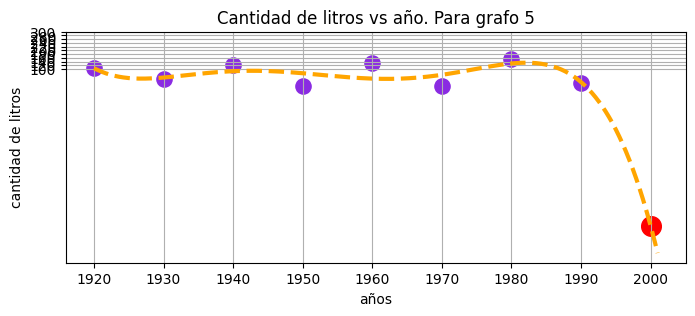

para grado 6 la prediccion es -1303.0%


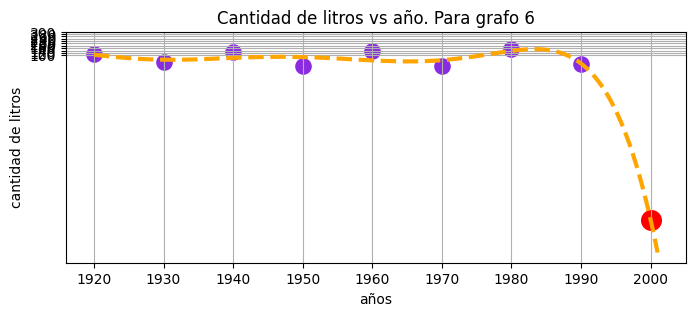

para grado 7 la prediccion es -1310.3%


C:\Users\ites_\AppData\Local\Temp\ipykernel_14864\1141120451.py:4: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x, y, i)


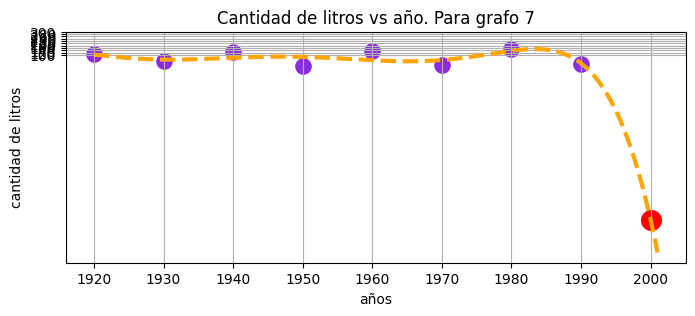

C:\Users\ites_\AppData\Local\Temp\ipykernel_14864\1141120451.py:4: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x, y, i)


para grado 8 la prediccion es -1322.9%


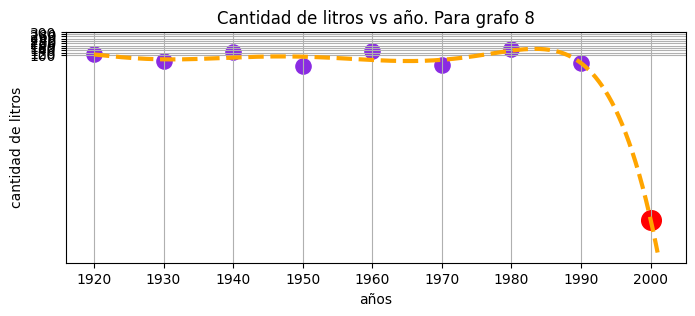

para grado 9 la prediccion es -1337.5%


C:\Users\ites_\AppData\Local\Temp\ipykernel_14864\1141120451.py:4: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x, y, i)


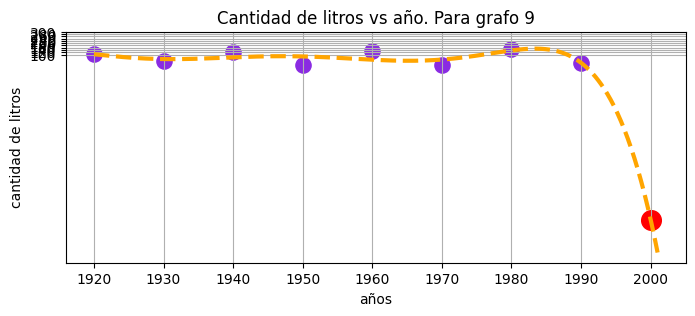

In [489]:
anio = 2000

for i in range(0,10):
    coef = np.polyfit(x, y, i)
    p = np.polyval(coef, anio)

    print(f'para grado {i} la prediccion es {p.round(1)}%')
    x1 = np.linspace(1920, anio + 1, 1000)
    y1 = fx(x1, coef) # función que creamos mas arriba
    plt.figure(figsize=(8, 3)) # (ancho, alto)
    plt.title(f'Cantidad de litros vs año. Para grafo {str(i)}')

    plt.scatter(x, y, s=120, c='blueviolet')
    plt.plot(x1, y1, "--", linewidth=3, color='orange')
    plt.scatter(anio, p, s=200, c='red')
    plt.yticks(range(100, 320, 20))
    plt.grid("on")
    ax = plt.gca()
    ax.set_xlabel("años")
    ax.set_ylabel("cantidad de litros")
    plt.show()